In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib
import pylab
from pylab import legend,plot,show,title,xlabel,ylabel
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import binom, poisson,norm,t
from numpy import random
import statsmodels 
from statsmodels import stats
from statsmodels.stats import weightstats as ssw 
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats import proportion as ssp
from scipy.stats import chisquare
from scipy.stats import chi2_contingency


In [2]:
apdata=pd.read_csv('application_data.csv')
priapp=pd.read_csv('previous_application.csv')

#### To check the number of Column and Rows Of dataset(Application_data)

In [3]:
apdata.shape

(307511, 122)

#### To check the number of Column and Rows Of dataset(Previous_Application)

In [4]:
priapp.shape

(1670214, 37)

In [5]:
apdata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
priapp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [7]:
priapp.isnull().sum()


SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

#### There are null values in large number

In [8]:
# It is use to find the percentage of missing value in each column in dataset(Previous_Application)
# so that we can remove the column which has more than 50% missing value
(priapp.isnull().sum()/len(priapp.index))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

#### This show that 4 columns have missing value is more than 50% 

In [9]:
priapp = priapp.drop(["AMT_DOWN_PAYMENT", "RATE_INTEREST_PRIMARY", "RATE_DOWN_PAYMENT", "RATE_INTEREST_PRIVILEGED"], axis=1)

In [10]:
priapp.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                820405
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMB

In [11]:
(priapp.isnull().sum()/len(priapp.index))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT     

#### Succefully removed the column which have more than 50% null values

#### Same for the Application_Data

In [12]:
pd.set_option('display.max_rows', None)
per = (apdata.isnull().sum() / len(apdata.index)) * 100
per
pd.reset_option('display.max_rows')

In [13]:
per = (apdata.isnull().sum() / len(apdata.index)) * 100
dropcol = per[per > 50].index
apdata = apdata.drop(columns=dropcol)
apdata

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
pd.set_option('display.max_rows', None)
per = (apdata.isnull().sum() / len(apdata.index)) * 100
print(per)
pd.reset_option('display.max_rows')

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [15]:
apdata

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
priapp

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,MONDAY,12,Y,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


.

### To remove Unwanted Column from dataset (Previous_Application)

In [17]:
priapp=priapp.drop(['FLAG_LAST_APPL_PER_CONTRACT','NAME_PORTFOLIO'],axis=1)

In [18]:
priapp.shape

(1670214, 31)

### To remove Unwanted Column from dataset (Application_Data)

In [19]:
for col in apdata.columns:
    print(col)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_2
EXT_SOURCE_3
YEARS_BEGINEXPLUATATION_AVG
FLOORSMAX_AVG
YEARS_BEGINEXPLUATATION_MODE
FLOORSMAX_MODE
YEARS_BEGINEXPLUATATION_MEDI
FLOORSMAX_MEDI
TOTALAREA_MODE
EMERGENCYSTATE_MODE
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAY

### Removed Unwanted Column like hour time and Day for application Etc

In [20]:
apdata=apdata.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','EXT_SOURCE_2','EXT_SOURCE_3','REG_CITY_NOT_WORK_CITY','FLAG_CONT_MOBILE','REGION_POPULATION_RELATIVE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','FLOORSMAX_MEDI','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY'],axis=1)

In [21]:
# Data set containing the data which is not use full for the analysis so removed the column whose name starts with 'FLAG_DOCUMENT'
apdata = apdata.loc[:, ~apdata.columns.str.startswith('FLAG_DOCUMENT')]

In [22]:
apdata.shape

(307511, 50)

### Data Filling in the place of null values; replace the null value with the median of that column For Dataset ('Previous_application')

In [23]:
(priapp.isnull().sum()/len(priapp.index))*100

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_ANNUITY                   22.286665
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000060
AMT_GOODS_PRICE               23.081773
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_TYPE_SUITE               49.119754
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000
CNT_PAYMENT                   22.286366
NAME_YIELD_GROUP               0.000000
PRODUCT_COMBINATION            0.020716


### There are columns which contains the null values to be filled (Application_Data)  

In [24]:
apdata['AMT_ANNUITY'] = apdata['AMT_ANNUITY'].fillna(apdata['AMT_ANNUITY'].median())

In [25]:
apdata['AMT_GOODS_PRICE'] = apdata['AMT_GOODS_PRICE'].fillna(apdata['AMT_GOODS_PRICE'].median())

In [26]:
apdata['YEARS_BEGINEXPLUATATION_AVG'] = apdata['YEARS_BEGINEXPLUATATION_AVG'].fillna(apdata['YEARS_BEGINEXPLUATATION_AVG'].median())

In [27]:
apdata['FLOORSMAX_AVG'] = apdata['FLOORSMAX_AVG'].fillna(apdata['FLOORSMAX_AVG'].median())

In [28]:
apdata['YEARS_BEGINEXPLUATATION_MODE'] = apdata['YEARS_BEGINEXPLUATATION_MODE'].fillna(apdata['YEARS_BEGINEXPLUATATION_MODE'].median())

In [29]:
apdata['FLOORSMAX_MODE'] = apdata['FLOORSMAX_MODE'].fillna(apdata['FLOORSMAX_MODE'].median())
apdata['YEARS_BEGINEXPLUATATION_MEDI'] = apdata['YEARS_BEGINEXPLUATATION_MEDI'].fillna(apdata['YEARS_BEGINEXPLUATATION_MEDI'].median())

In [30]:
apdata['TOTALAREA_MODE'] = apdata['TOTALAREA_MODE'].fillna(apdata['TOTALAREA_MODE'].median())

In [31]:
apdata['AMT_REQ_CREDIT_BUREAU_MON'] = apdata['AMT_REQ_CREDIT_BUREAU_MON'].fillna(apdata['AMT_REQ_CREDIT_BUREAU_MON'].median())
apdata['AMT_REQ_CREDIT_BUREAU_YEAR'] = apdata['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(apdata['AMT_REQ_CREDIT_BUREAU_YEAR'].median())

In [32]:
pd.set_option('display.max_rows', None)
per = (apdata.isnull().sum() / len(apdata.index)) * 100
print(per)
pd.reset_option('display.max_rows')

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.000000
AMT_GOODS_PRICE                  0.000000
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0.000000
FLAG_PHONE                       0

#### Duplicate rows are also removed 

In [33]:
apdata = apdata.drop_duplicates()

In [34]:
apdata.shape

(307511, 50)

### There are columns which contains the null values to be filled (Previous Application)  

In [35]:
(priapp.isnull().sum()/len(priapp.index))*100

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_ANNUITY                   22.286665
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000060
AMT_GOODS_PRICE               23.081773
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_TYPE_SUITE               49.119754
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000
CNT_PAYMENT                   22.286366
NAME_YIELD_GROUP               0.000000
PRODUCT_COMBINATION            0.020716


In [36]:
priapp['AMT_ANNUITY'] = priapp['AMT_ANNUITY'].fillna(priapp['AMT_ANNUITY'].median())

In [37]:
priapp['AMT_GOODS_PRICE'] = priapp['AMT_GOODS_PRICE'].fillna(priapp['AMT_GOODS_PRICE'].median())

In [38]:
priapp['CNT_PAYMENT'] = priapp['CNT_PAYMENT'].fillna(priapp['CNT_PAYMENT'].median())

In [39]:
priapp['DAYS_FIRST_DRAWING'] = priapp['DAYS_FIRST_DRAWING'].fillna(priapp['DAYS_FIRST_DRAWING'].median())

In [40]:
priapp['DAYS_FIRST_DUE'] = priapp['DAYS_FIRST_DUE'].fillna(priapp['DAYS_FIRST_DUE'].median())

In [41]:
priapp['DAYS_LAST_DUE_1ST_VERSION'] = priapp['DAYS_LAST_DUE_1ST_VERSION'].fillna(priapp['DAYS_LAST_DUE_1ST_VERSION'].median())

In [42]:
priapp['DAYS_LAST_DUE'] = priapp['DAYS_LAST_DUE'].fillna(priapp['DAYS_LAST_DUE'].median())


In [43]:
priapp['DAYS_TERMINATION'] = priapp['DAYS_TERMINATION'].fillna(priapp['DAYS_TERMINATION'].median())

In [44]:
priapp['NFLAG_INSURED_ON_APPROVAL'] = priapp['NFLAG_INSURED_ON_APPROVAL'].fillna(priapp['NFLAG_INSURED_ON_APPROVAL'].median())

In [45]:
(priapp.isnull().sum()/len(priapp.index))*100

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_ANNUITY                    0.000000
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000060
AMT_GOODS_PRICE                0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_TYPE_SUITE               49.119754
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000
CNT_PAYMENT                    0.000000
NAME_YIELD_GROUP               0.000000
PRODUCT_COMBINATION            0.020716


In [46]:
apdata=apdata.drop(['CNT_CHILDREN','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_WEEK','DEF_30_CNT_SOCIAL_CIRCLE','YEARS_BEGINEXPLUATATION_MEDI','NAME_TYPE_SUITE','FLAG_MOBIL','FLAG_PHONE','FLOORSMAX_AVG','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_QRT','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE'],axis=1)
apdata.shape

(307511, 38)

In [47]:
priapp=priapp.drop(['HOUR_APPR_PROCESS_START','DAYS_DECISION','CHANNEL_TYPE','SELLERPLACE_AREA','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION','DAYS_LAST_DUE_1ST_VERSION'],axis=1)
priapp.shape

(1670214, 23)

In [48]:
priapp=priapp.drop(['NAME_TYPE_SUITE'],axis=1)

# Removing Outlier For both Datasets

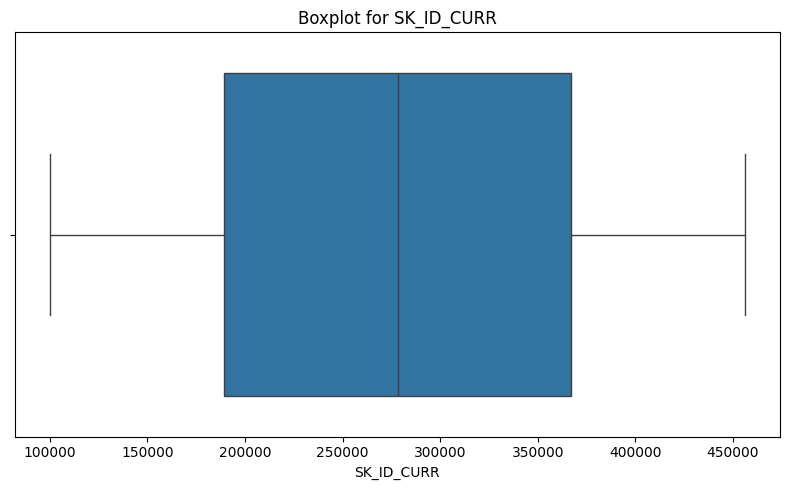

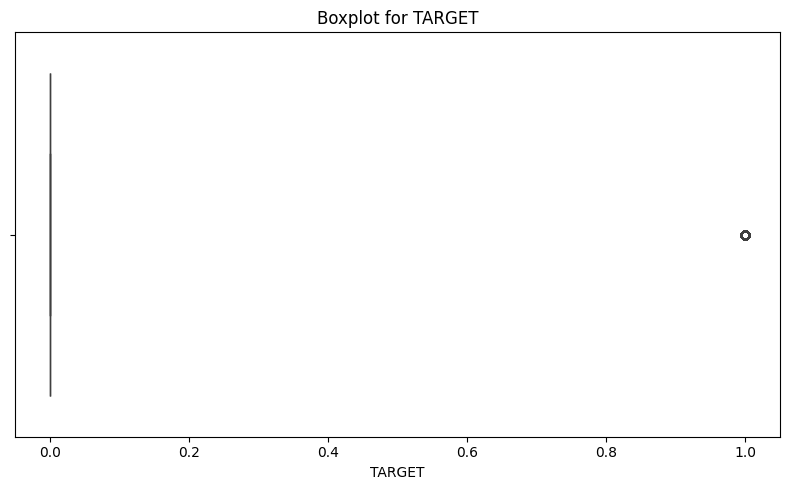

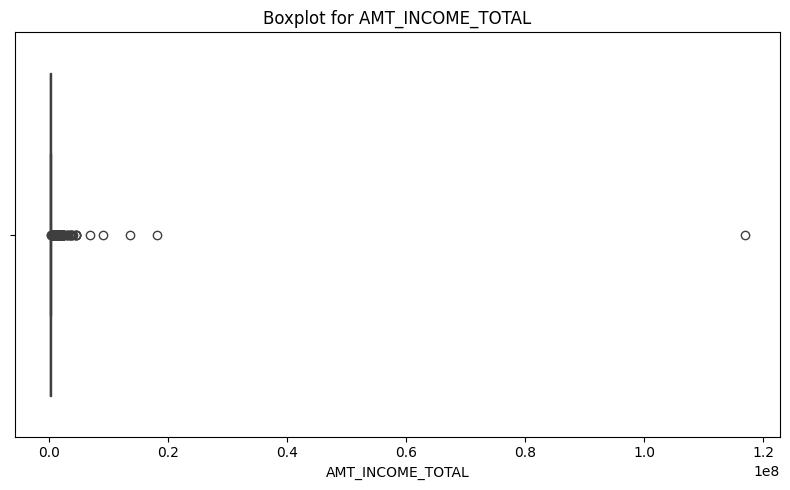

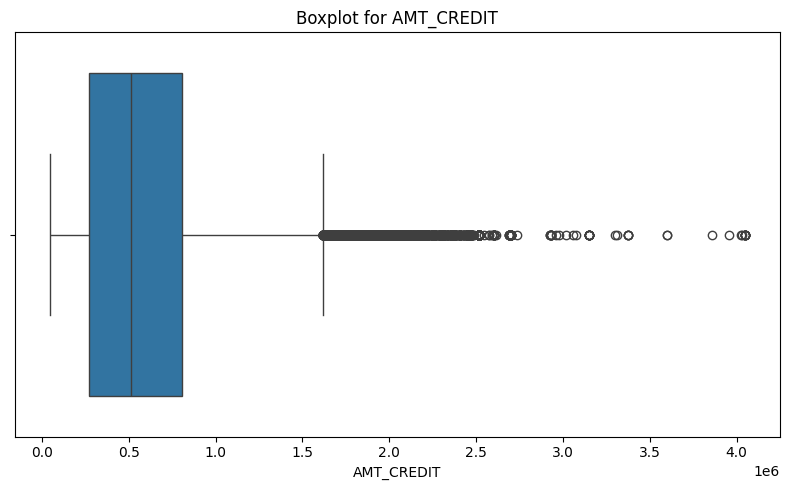

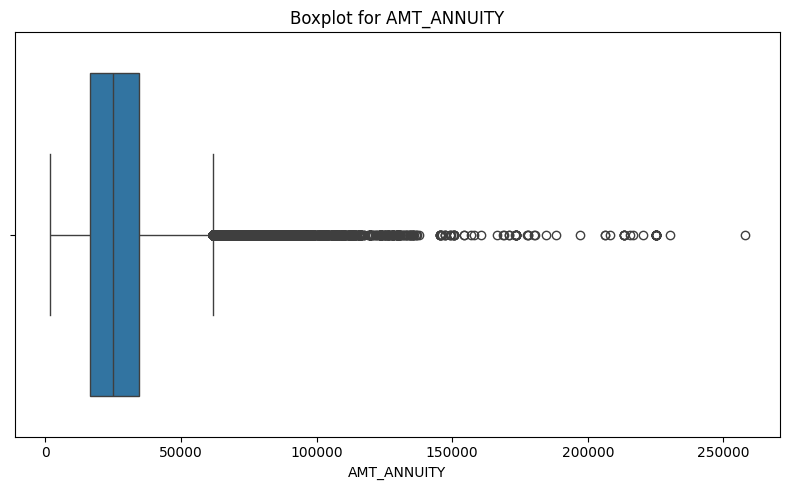

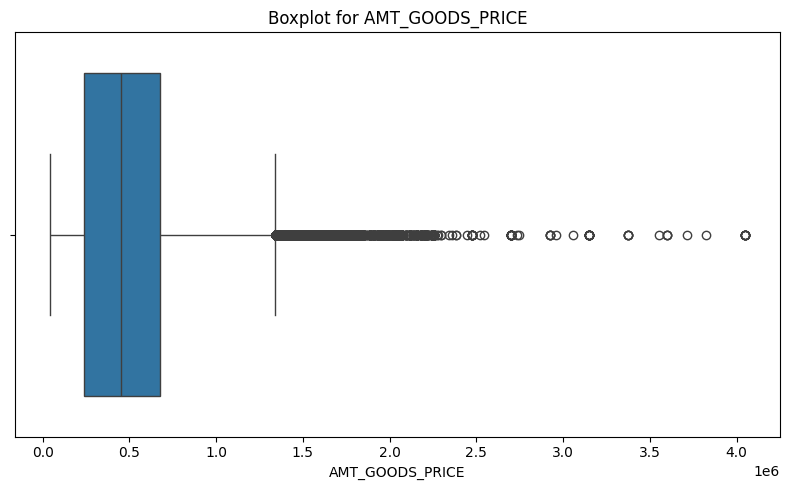

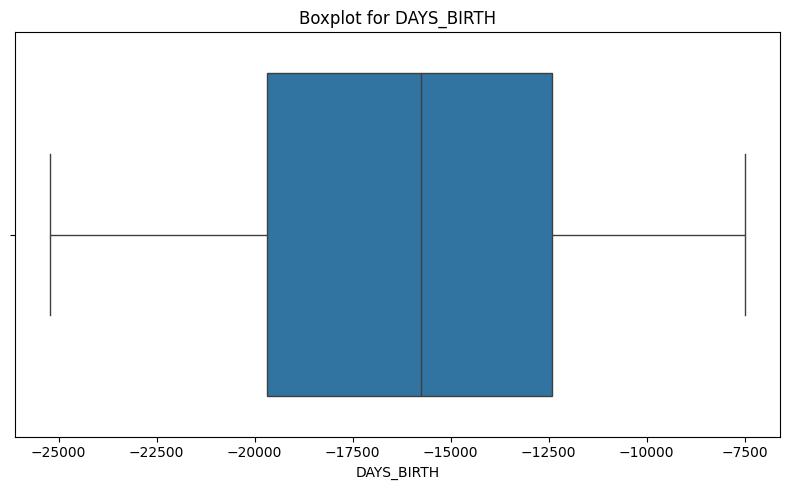

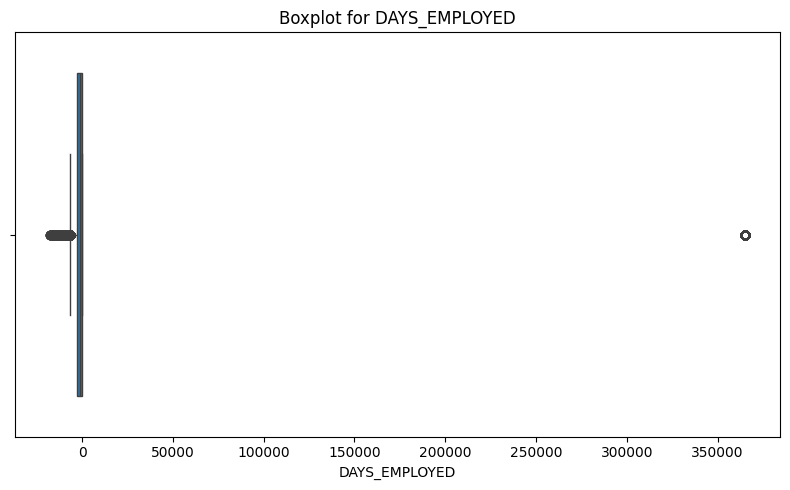

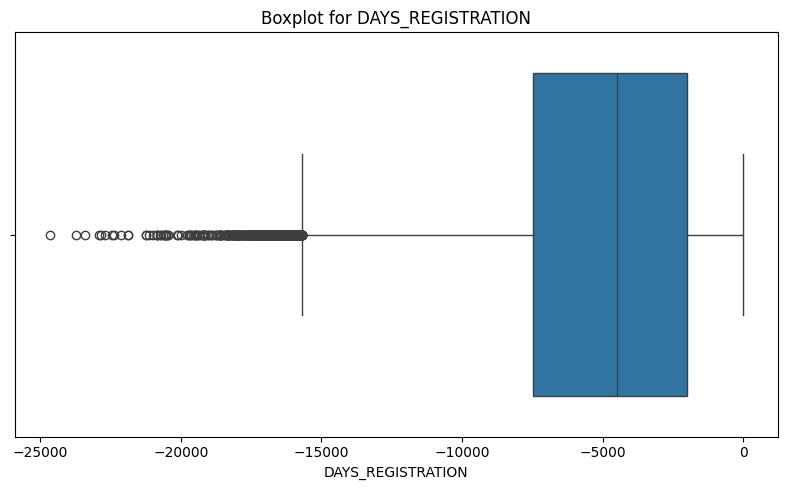

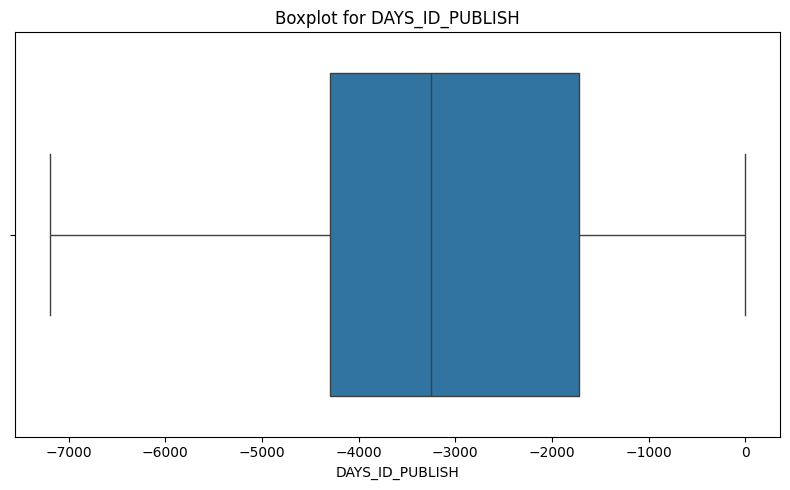

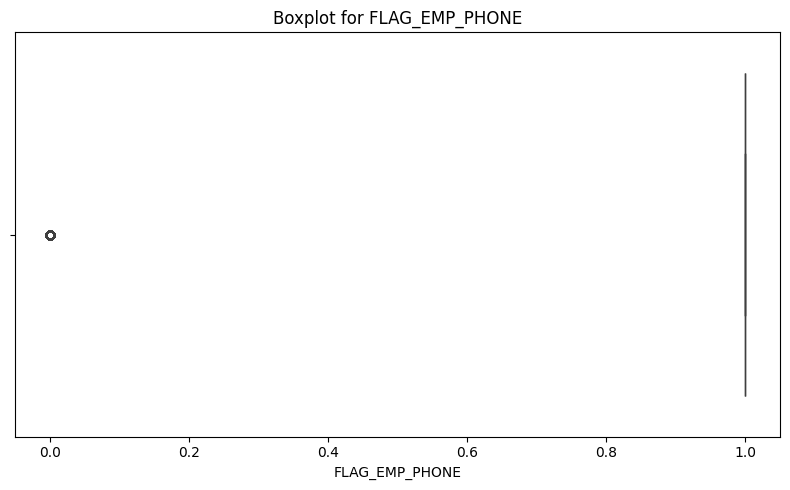

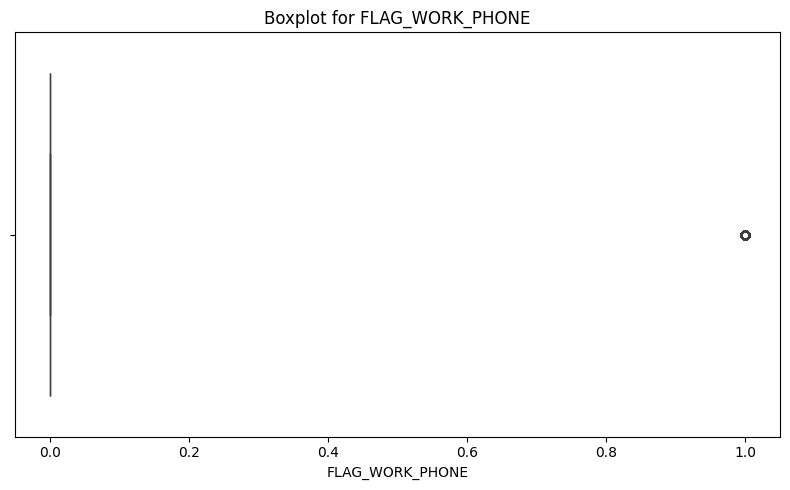

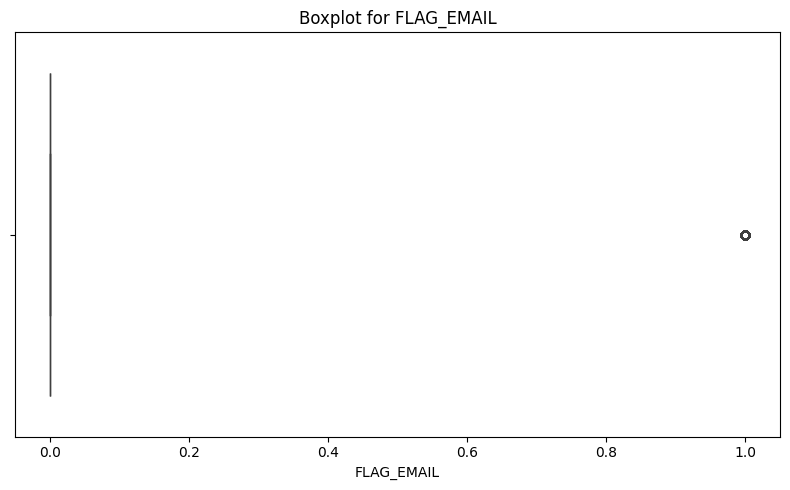

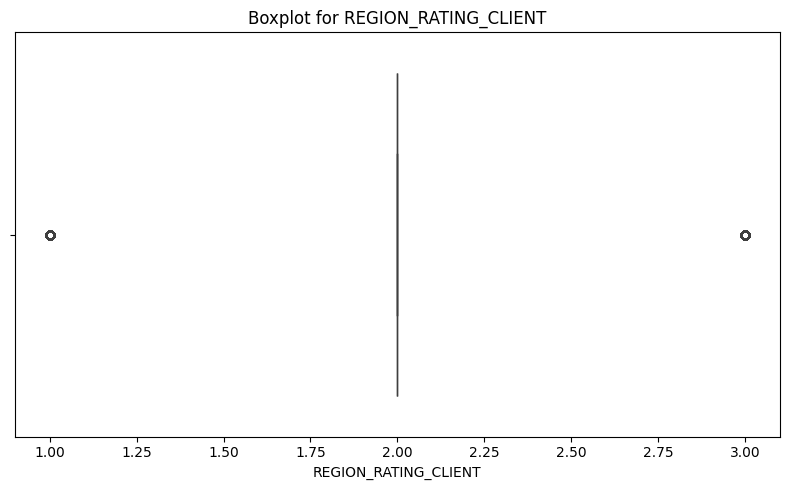

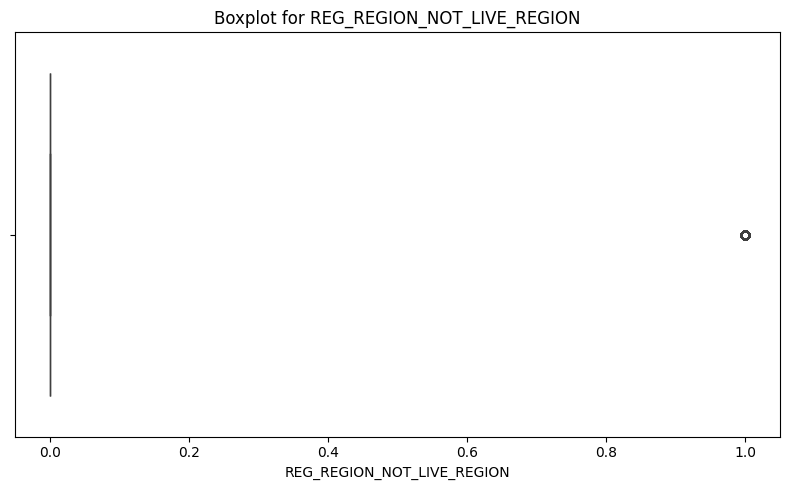

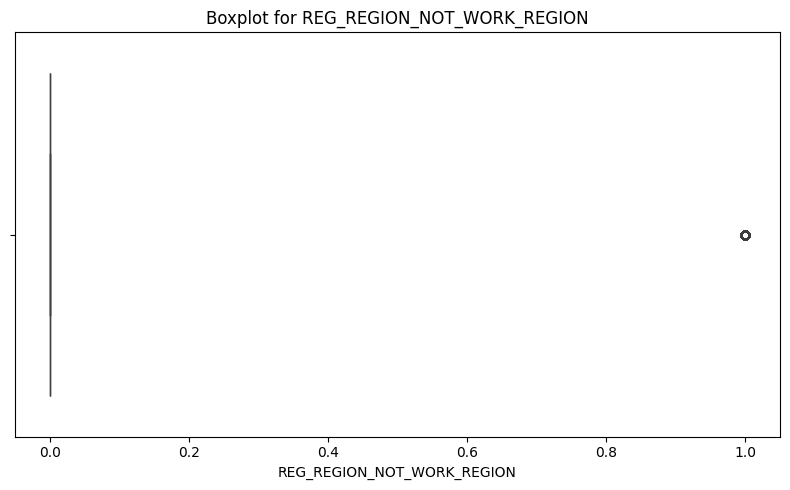

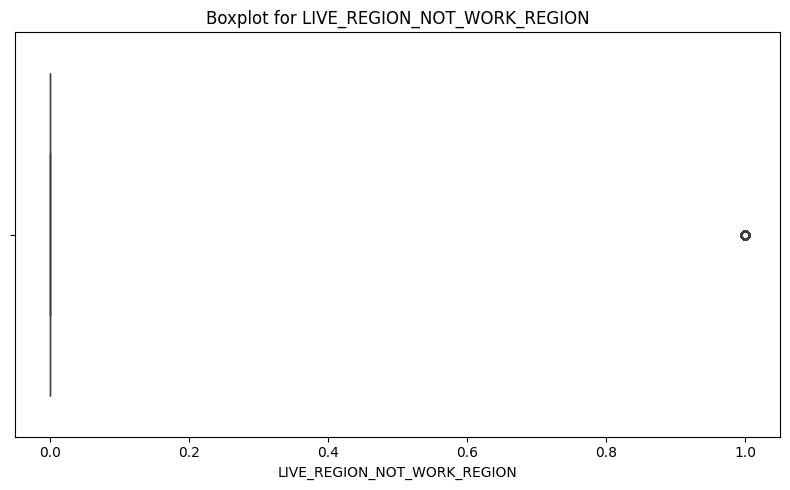

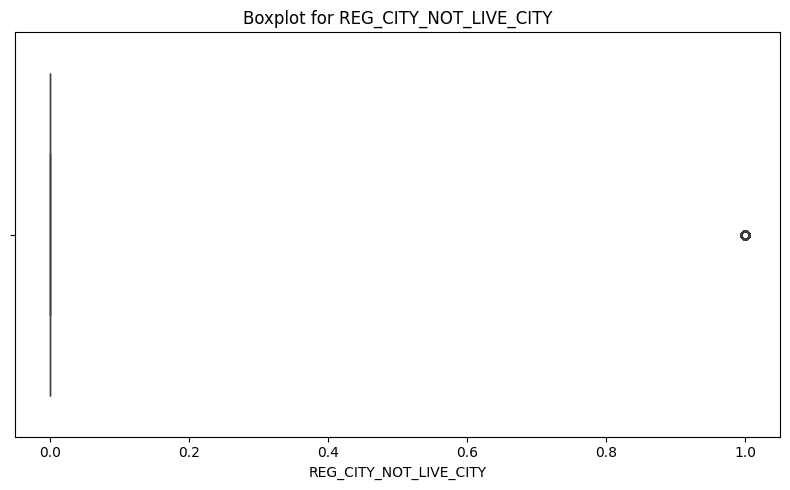

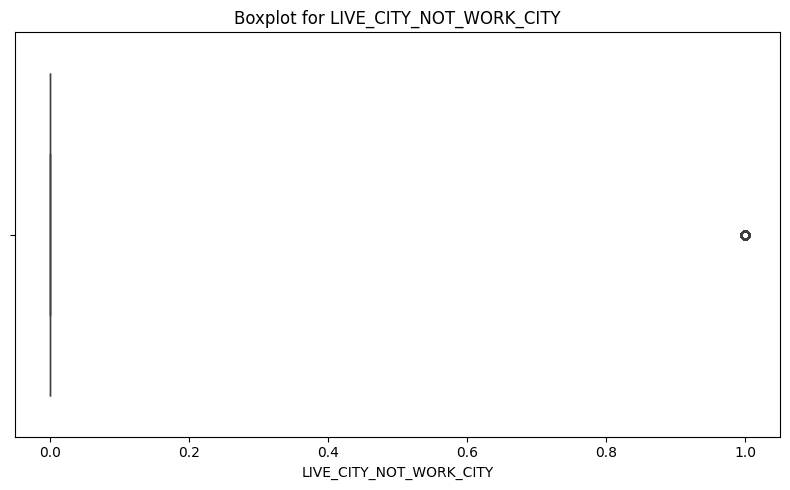

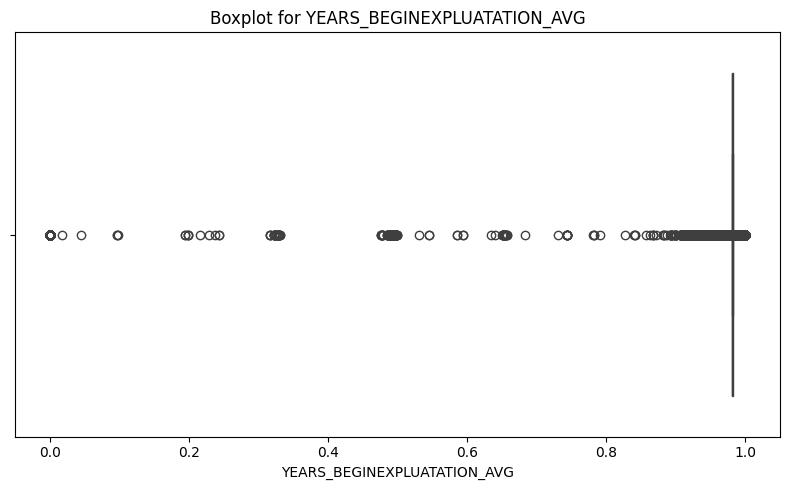

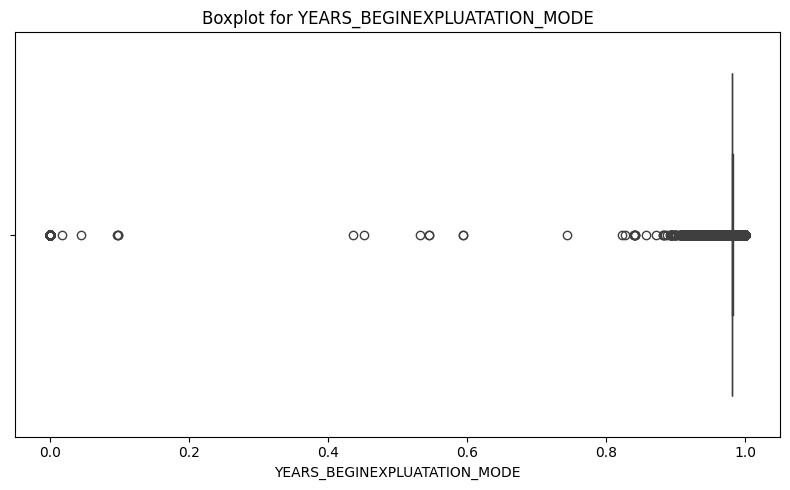

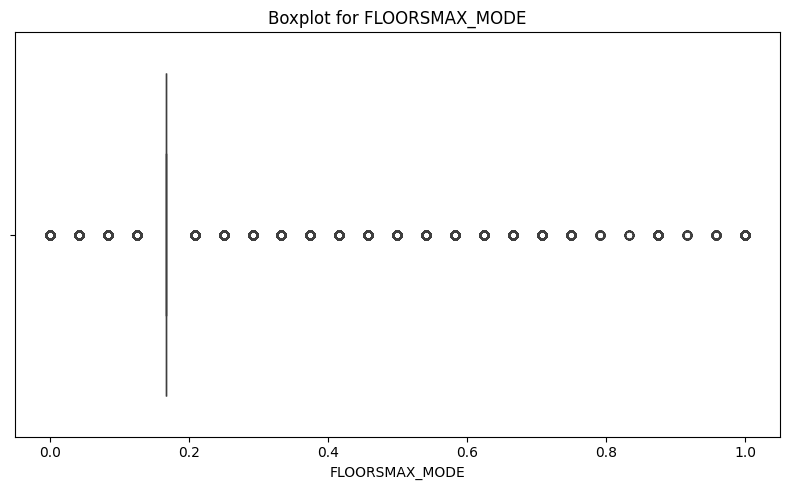

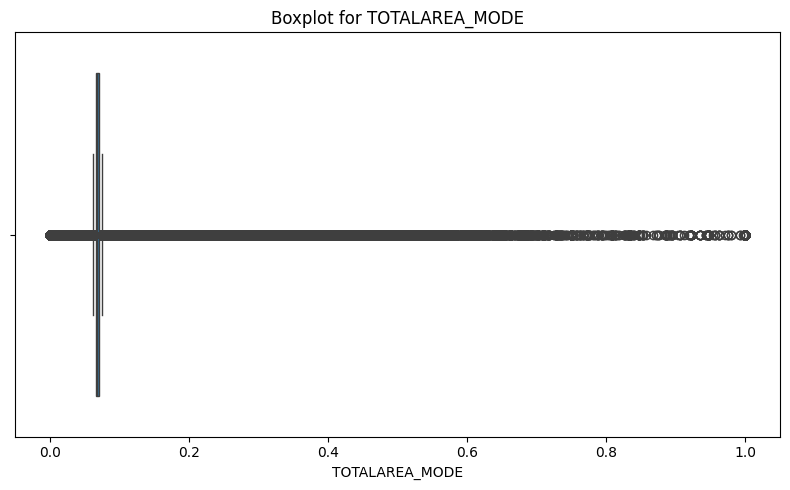

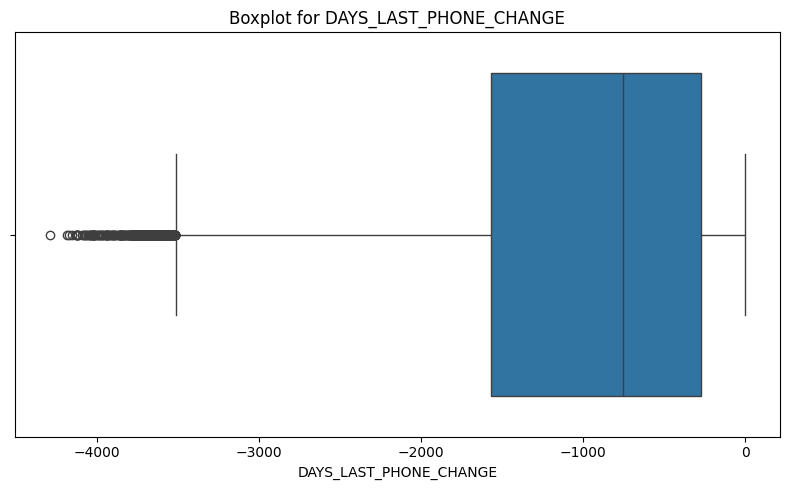

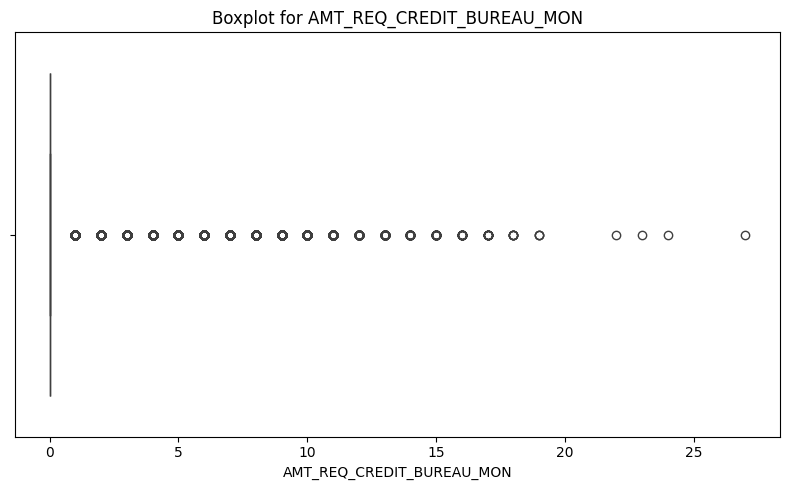

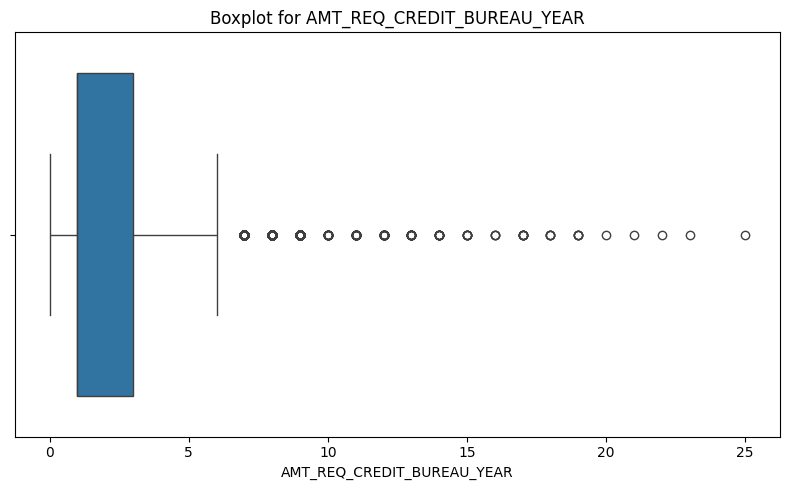

In [49]:
numcols = apdata.select_dtypes(include=['number']).columns
for col in numcols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=apdata[col]) 
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show() 

#### Refering to the boxplot it seems that every column contain the huge outlier 
#### To get the better insight from the data the outlier must be removed

In [50]:
outlier_df = apdata.copy() 
numerical_cols = outlier_df.select_dtypes(include=['number']).columns
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
cleaned_df = remove_outliers(outlier_df, numerical_cols)
print(f"Original dataset size: {outlier_df.shape}")
print(f"Cleaned dataset size: {cleaned_df.shape}")

Original dataset size: (307511, 38)
Cleaned dataset size: (23142, 38)


In [51]:
cleaned_df=apdata

#### The outlier are removed from every column of the dataset -Application Data

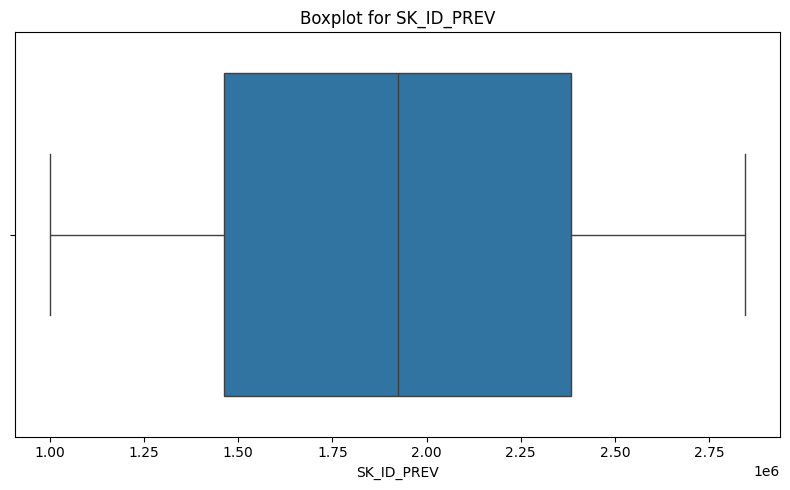

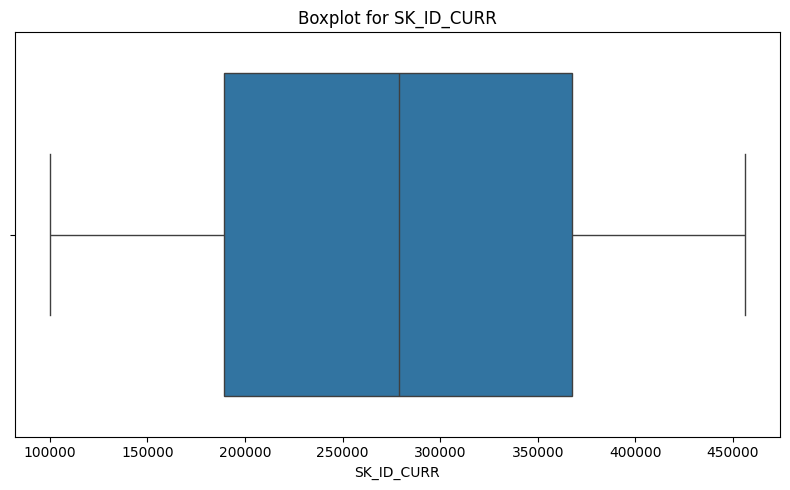

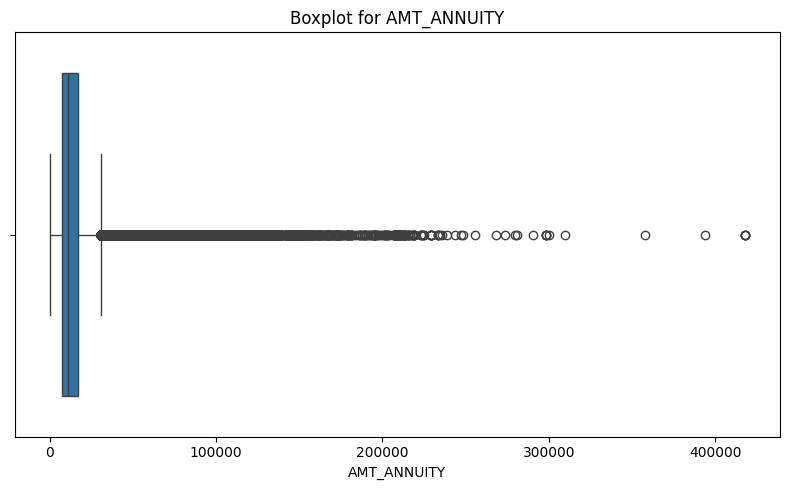

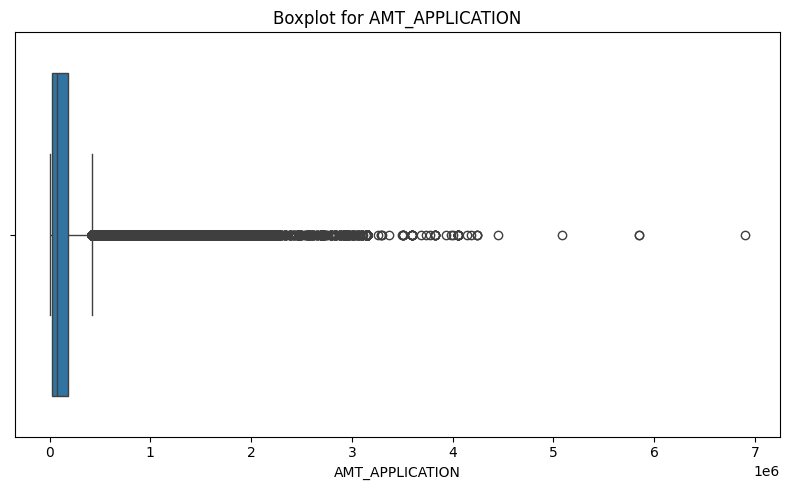

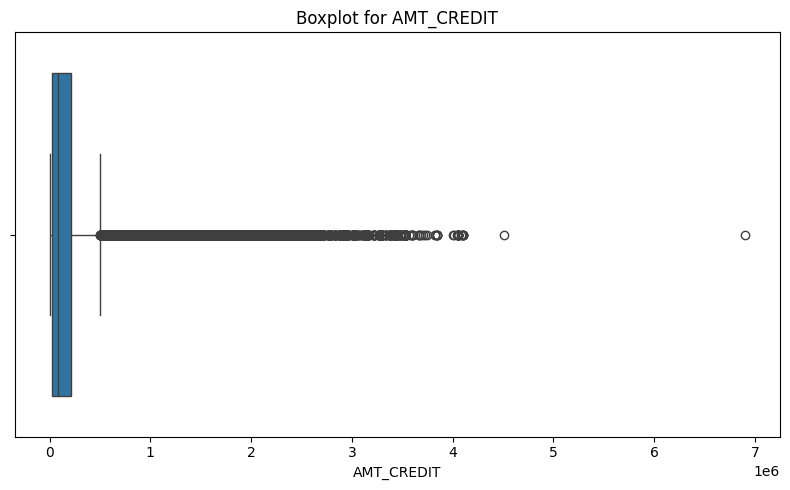

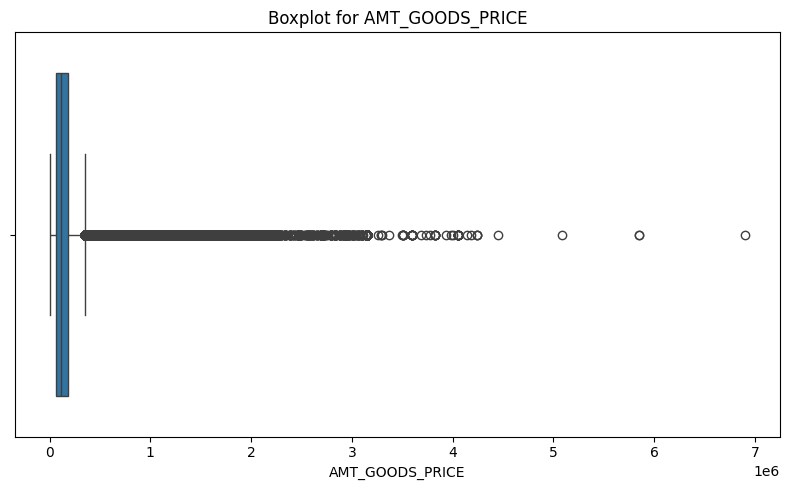

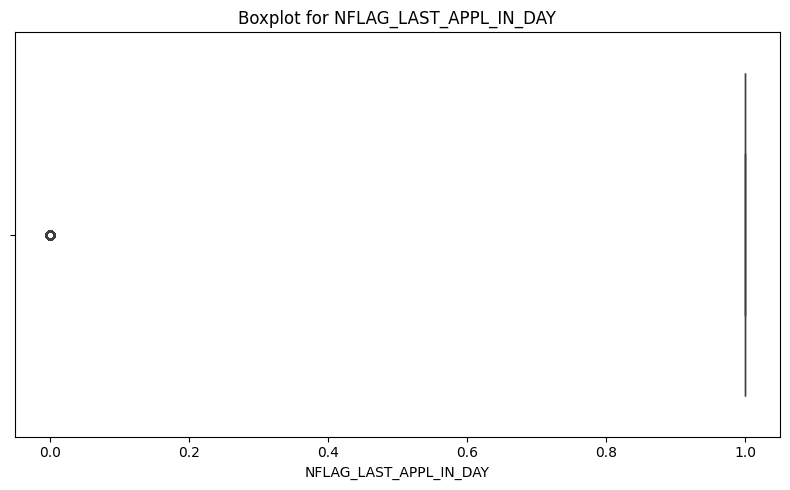

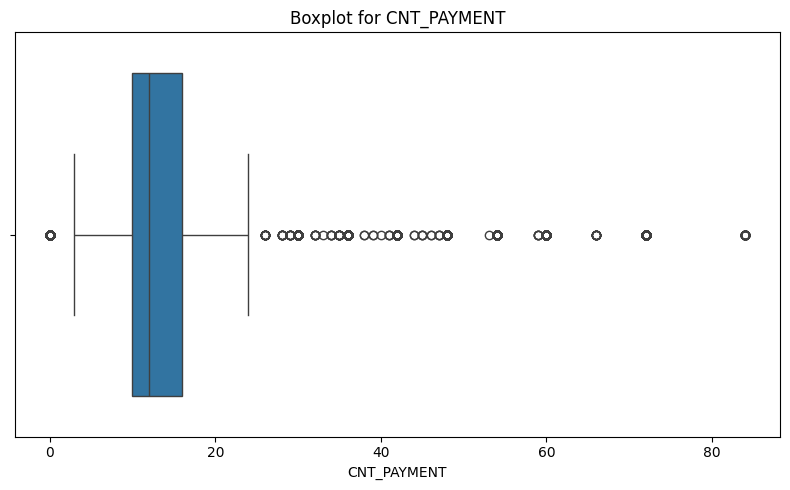

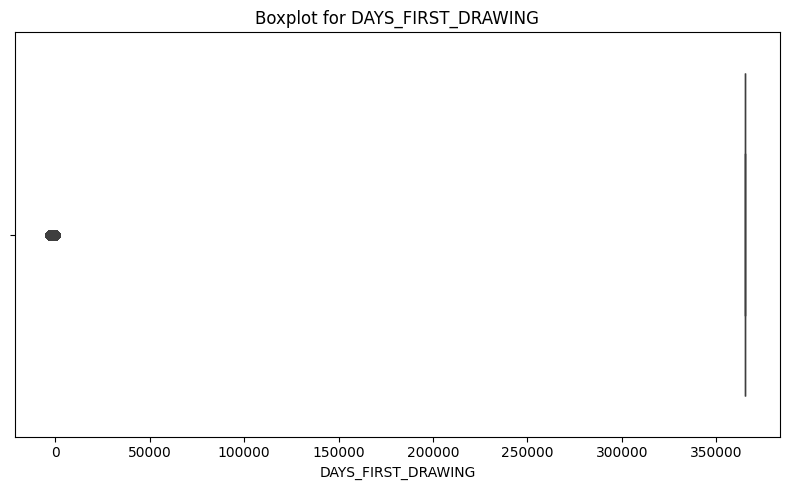

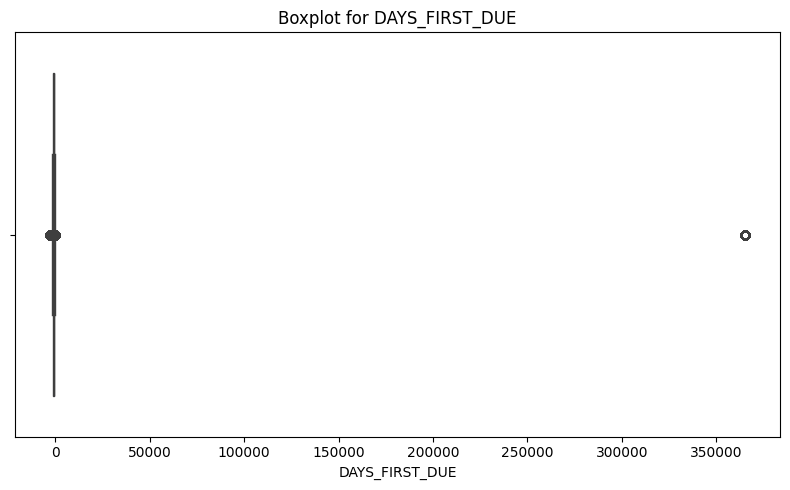

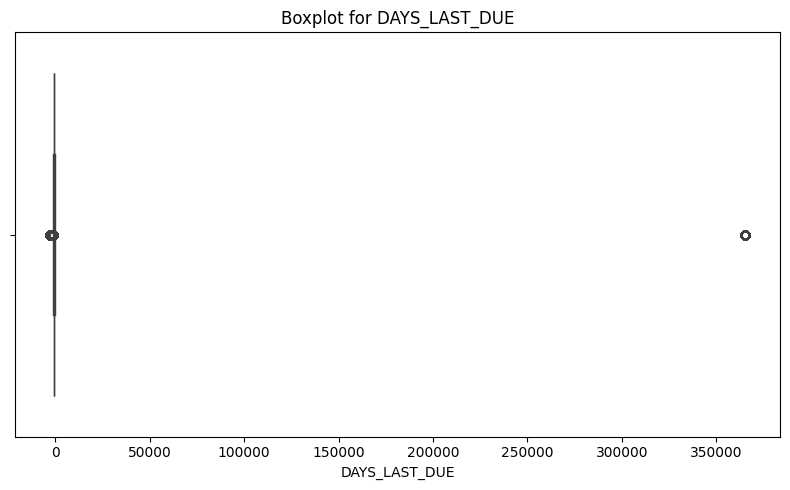

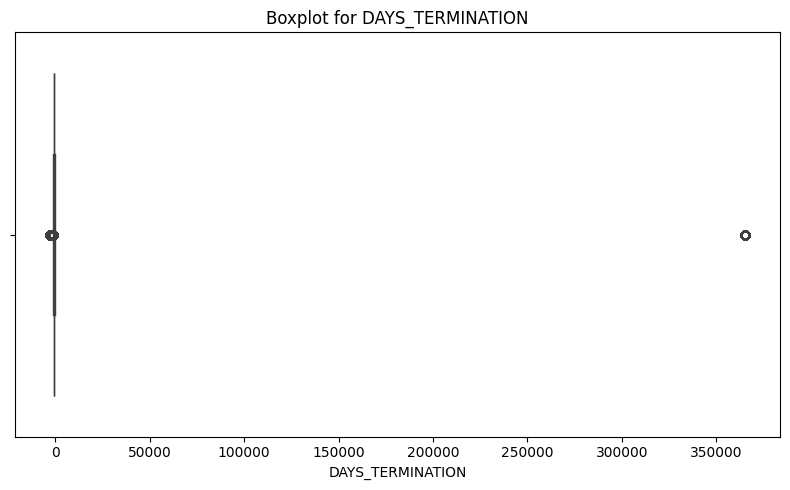

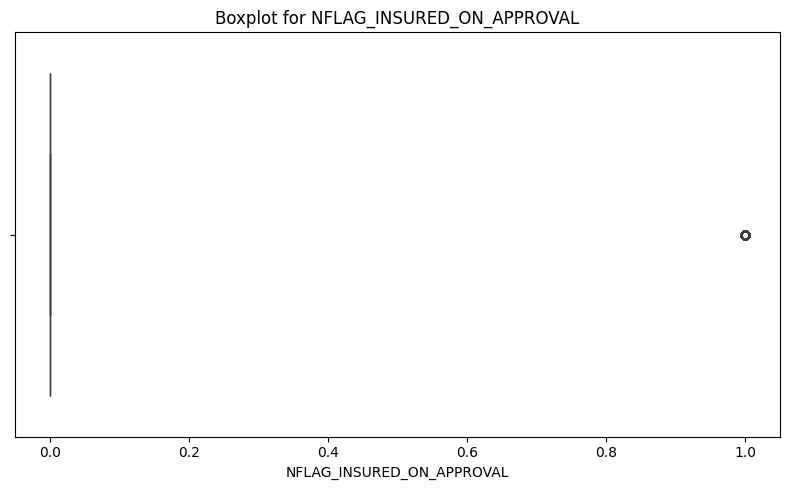

In [52]:
numcols = priapp.select_dtypes(include=['number']).columns
for col in numcols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=priapp[col]) 
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show() 

In [53]:
outlier_df = priapp.copy() 
numerical_cols = outlier_df.select_dtypes(include=['number']).columns
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
priapp = remove_outliers(outlier_df, numerical_cols)
print(f"Original dataset size: {outlier_df.shape}")
print(f"Cleaned dataset size: {cleaned_df.shape}")

Original dataset size: (1670214, 22)
Cleaned dataset size: (307511, 38)


## Cleaned Dataset 

#### The column which are only usefull for the analysis 

In [54]:
apdata.shape

(307511, 38)

In [55]:
priapp.shape

(456526, 22)

# Data Visualization on Previous Application Dataset
### Univariate Analysis (PreviousApplication)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12708\3042478403.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NAME_CLIENT_TYPE', data=priapp, palette='pastel')


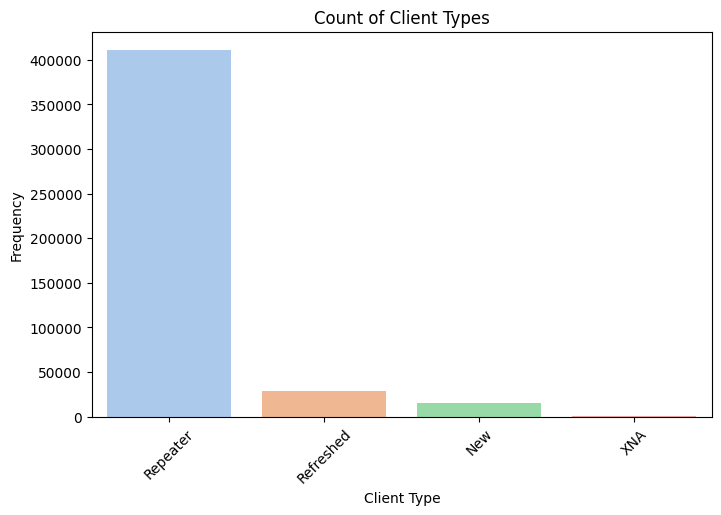

In [56]:
# Visualize the distribution of client types in the dataset.

plt.figure(figsize=(8, 5))
sns.countplot(x='NAME_CLIENT_TYPE', data=priapp, palette='pastel')
plt.title('Count of Client Types')
plt.xlabel('Client Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### From this we got an insight that Repeater(regular) applied more and New client applied less as compared to other
### Need to focus on New Client for more For Company Growth

## Bi-Variate Analysis (Previous Application Dataset)

Text(0.5, 1.0, 'Loan Amounts by Client Type')

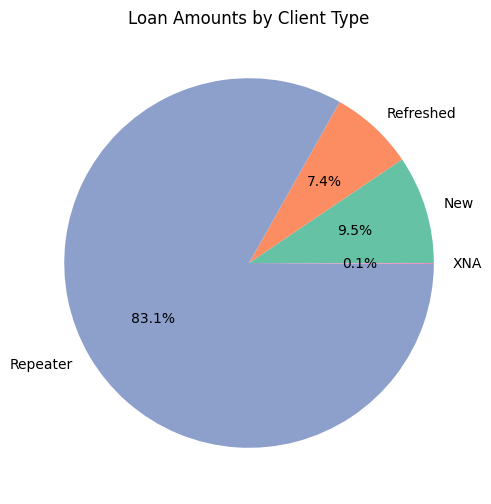

In [57]:
# Compare loan application amounts across different client types.
clidata = priapp.groupby('NAME_CLIENT_TYPE')['AMT_APPLICATION'].sum()
plt.figure(figsize=(8, 6))
plt.pie(clidata, labels=clidata.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Loan Amounts by Client Type')

#### From this we got an insight that Repeater(regular) Applied more and New client applied less as compared to other 
#### Need to focus on New Client for more For Company Growth

In [70]:
numeric_columns = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']
correlation_matrix = priapp[numeric_columns].corr()

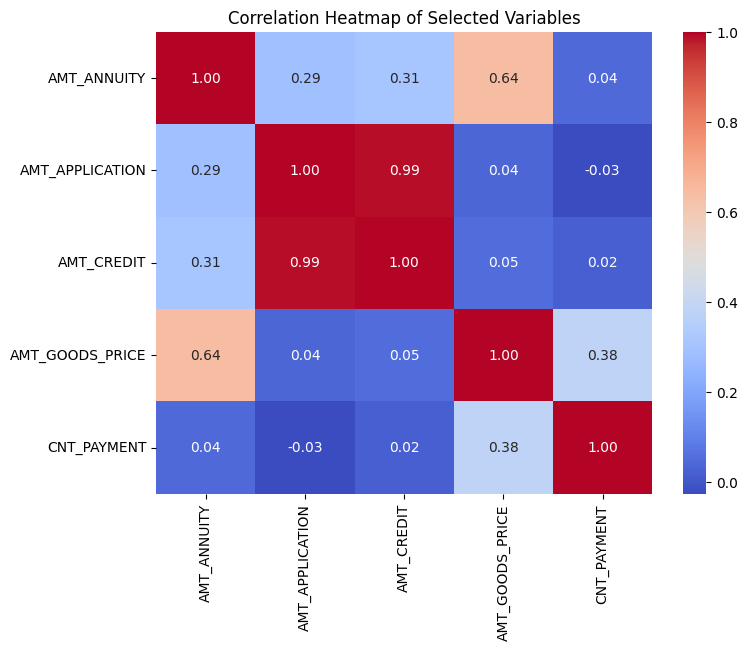

In [59]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Selected Variables")
plt.show()

# Insights On Application Data

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12708\3756062169.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', data=apdata, errorbar=None, palette='mako')


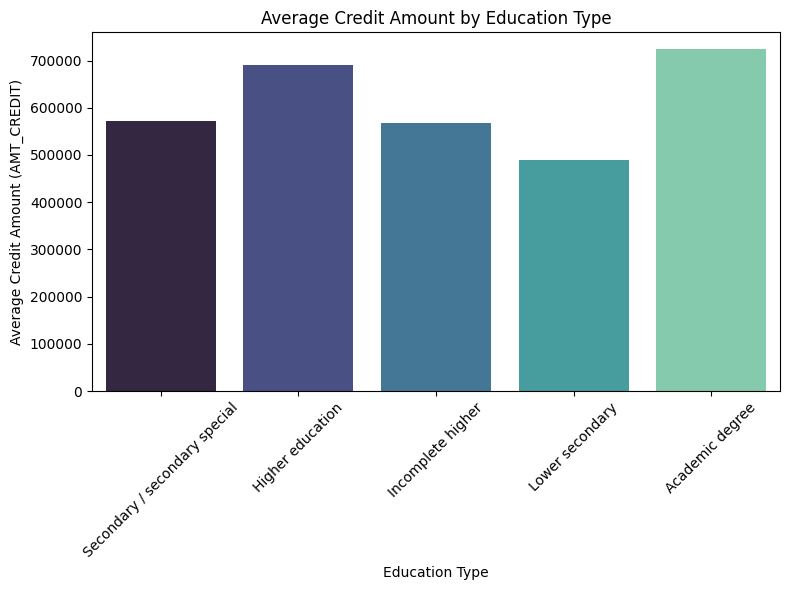

In [75]:
plt.figure(figsize=(8, 6))
sns.barplot(x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', data=apdata, errorbar=None, palette='mako')
plt.title('Average Credit Amount by Education Type')
plt.xlabel('Education Type')
plt.ylabel('Average Credit Amount (AMT_CREDIT)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### This shows the average credit amount across different education levels
#### In This SHows that client completed there Education in 'Academic Degree' has maximum Average Credit Amount 


C:\Users\lenovo\AppData\Local\Temp\ipykernel_12708\4260259025.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=priapp, x='NAME_CONTRACT_TYPE', palette='coolwarm')


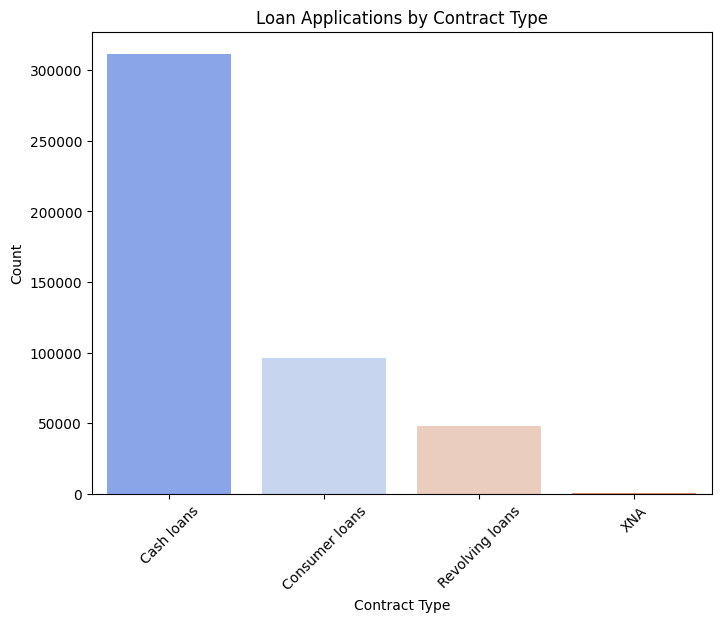

In [61]:
plt.figure(figsize=(8, 6))
sns.countplot(data=priapp, x='NAME_CONTRACT_TYPE', palette='coolwarm')
plt.title('Loan Applications by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Loan Applications is higher than all other loan
#### This shows that company should focus on increasing other contract types, especially non-cash loans.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12708\1339694227.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=apdata['NAME_CONTRACT_TYPE'], palette='Set2', edgecolor='black')


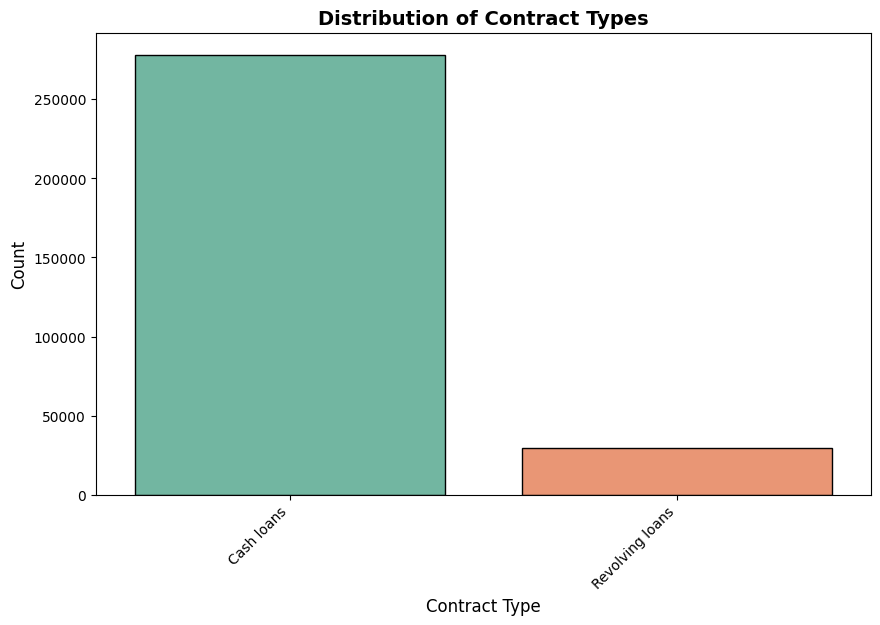

In [74]:
plt.figure(figsize=(10, 6))
sns.countplot(x=apdata['NAME_CONTRACT_TYPE'], palette='Set2', edgecolor='black')
plt.title('Distribution of Contract Types', fontsize=14, fontweight='bold')
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

#### The company may see higher demand for cash loans
#### The company may observe higher cash loan demand, suggesting opportunities to expand offerings and services


([0, 1, 2], [Text(0, 0, 'M'), Text(1, 0, 'F'), Text(2, 0, 'XNA')])

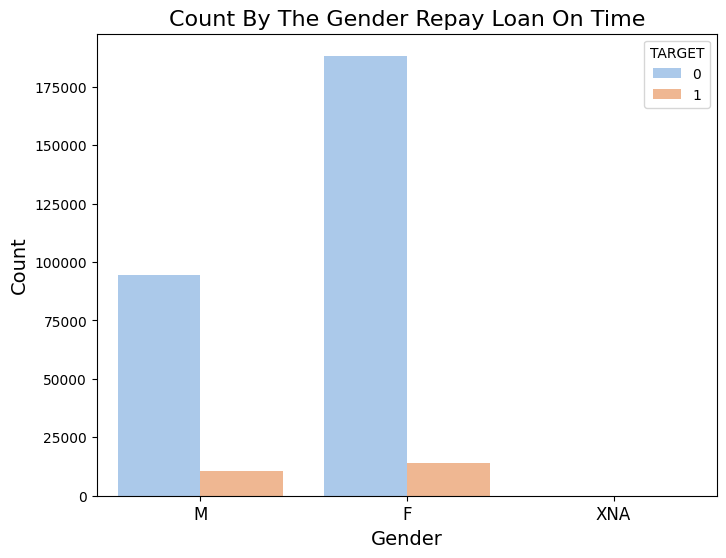

In [79]:
plt.figure(figsize=(8, 6))
sns.countplot(x=apdata['CODE_GENDER'], hue=apdata['TARGET'], palette='pastel')
plt.title('Count By The Gender Repay Loan On Time', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)

#### This show that Female use to repay the loan on time than Male

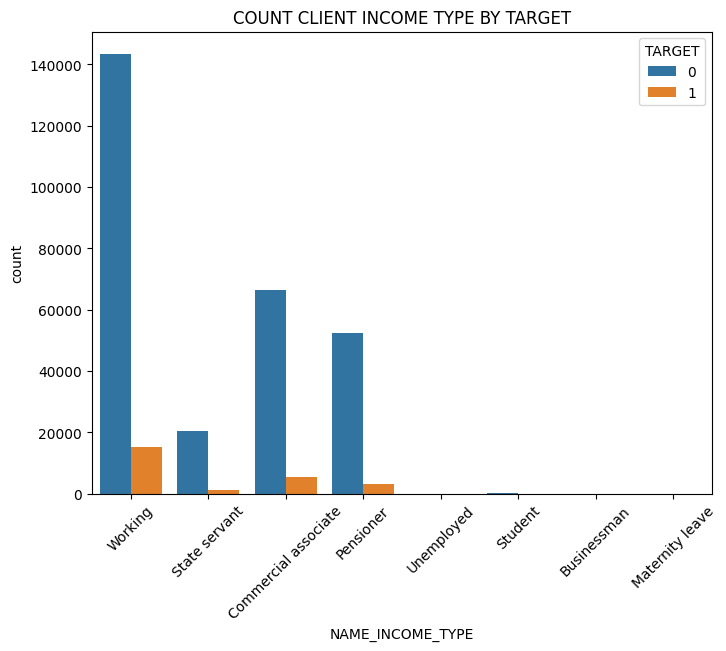

In [80]:
plt.figure(figsize=(8, 6))
sns.countplot(x=apdata['NAME_INCOME_TYPE'], hue=apdata['TARGET'])
plt.title('COUNT CLIENT INCOME TYPE BY TARGET')
plt.xticks(rotation=45)
plt.show()

#### This show that the maximum application comes from client having INCOME TYPE is Working

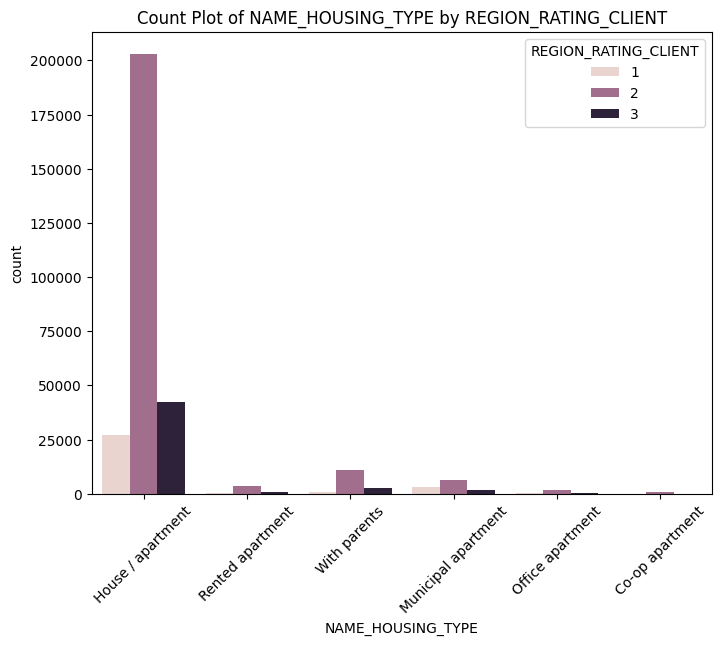

In [81]:
plt.figure(figsize=(8, 6))
sns.countplot(x=apdata['NAME_HOUSING_TYPE'], hue=apdata['REGION_RATING_CLIENT'])
plt.title('Count Plot of NAME_HOUSING_TYPE by REGION_RATING_CLIENT')
plt.xticks(rotation=45)
plt.show()

#### This show that client those having HOUSE/APARTMENT have applied in large number

#### The analysis of the loan and banking datasets revealed critical insights into client behavior, loan characteristics, and factors contributing to default risk. In the Previous_Application dataset, we analyzed loan application amounts, contract statuses, and client types, identifying patterns in approvals, cancellations, and refusals. Bivariate analysis further uncovered relationships between loan attributes, such as the purpose of the loan, credit amounts, and contract status, showing how these factors influence client outcomes. For example, certain loan purposes and contract statuses were more likely to be associated with higher default risks.
#### In the Application_Data dataset, the distribution of the TARGET variable highlighted demographic and financial factors driving default likelihoods, including employment stability, income levels, and housing types. 
#### Overall, the analysis underscores the interplay between client demographics, financial stability, and loan outcomes. It highlights the importance of understanding factors like education, housing, and contract types in assessing credit risk. These findings provide actionable insights for designing tailored loan policies, improving approval strategies, and minimizing default risks, ultimately supporting better data-driven decision-making in the banking sector.